In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('./data/직무능력평가.csv')
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [8]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [9]:
df_y = df_raw_scaled[:, 0]
df_x = df_raw_scaled[:, 1:]

Text(0, 0.5, 'sample index')

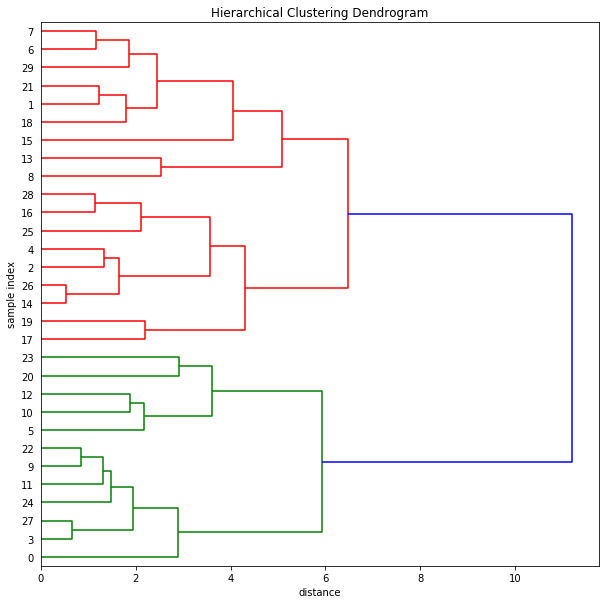

In [10]:
Z_ward = linkage(df_x, method = 'ward', metric = 'euclidean')
Z_average = linkage(df_x, method = 'average', metric = 'euclidean')
Z_Minkowski = linkage(df_x, method = 'average', metric = 'minkowski')

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

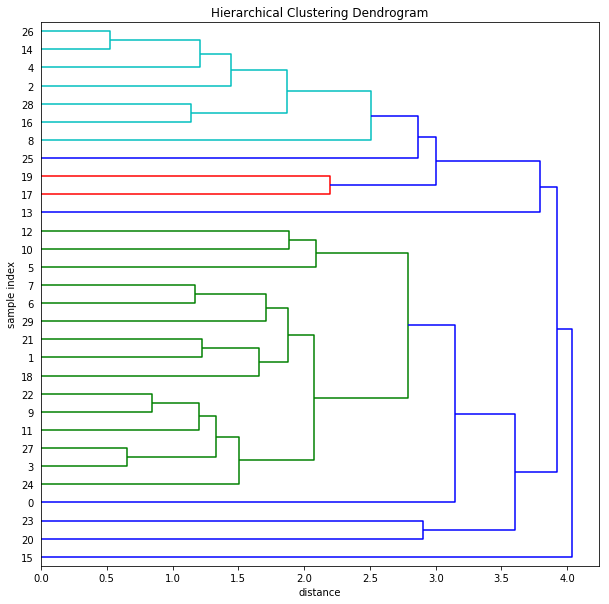

In [11]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

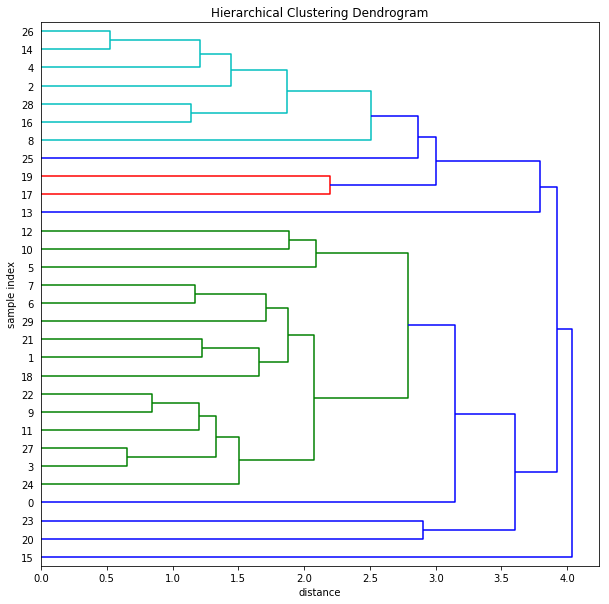

In [12]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

In [13]:
cluster_hierarchical = fcluster(Z = Z_ward, t = 5, criterion = 'distance')
df['ClusterHierarchical'] = cluster_hierarchical
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [14]:
ds_summary_hc = df.groupby('ClusterHierarchical').agg(['min', 'mean', 'max'])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + '_' + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [15]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = list()
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_x)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster':cluster_range, 'Error':clus_error})

In [16]:
ds_error.round(3)

,NumberofCluster,Error
0,1,180.000
1,2,114.083
2,3,94.369
3,4,78.502
4,5,66.860
5,6,57.725
6,7,51.823
7,8,44.624
8,9,37.714
9,10,33.879


Text(0, 0.5, 'Sum of squared distance')

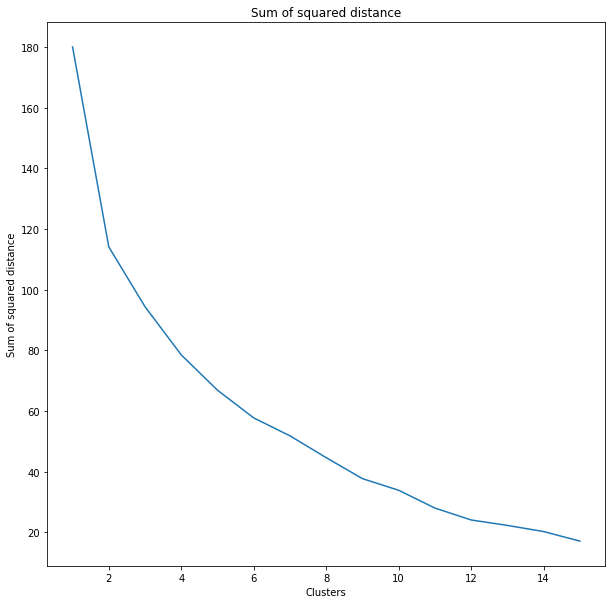

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title('Sum of squared distance')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

In [18]:
clus = KMeans(5)
clus.fit(df_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df['ClusterKmeans'] = cluster_kmeans
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,2
1,63,64,51,54,63,73,47,5,1
2,71,70,68,69,76,86,48,3,4
3,61,63,45,47,54,84,35,1,2
4,81,78,56,66,71,83,47,3,4


In [19]:
ds_summary_km = df.drop('ClusterHierarchical', axis = 1, inplace = False).groupby('ClusterKmeans').agg(['min', 'mean', 'max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,50,66.750,82,58,70.875,90,39,49.750,68,...,72,60,66.000,75,54,72.750,85,35,42.125,52
1,2,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
2,3,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
3,4,65,74.625,85,60,75.875,85,54,62.750,71,...,75,55,75.625,88,74,79.125,86,46,55.000,72
4,5,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35


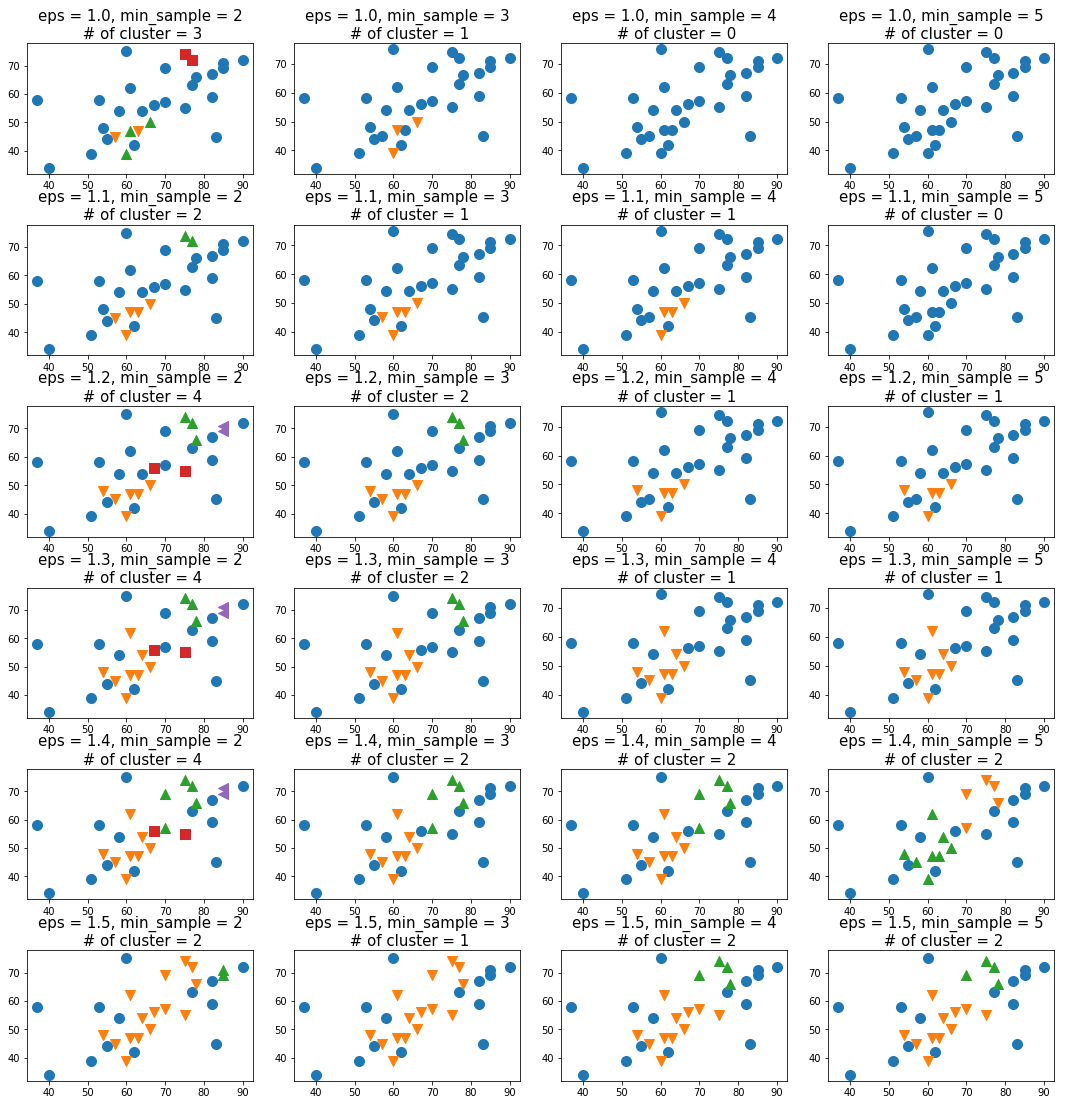

In [20]:
X = df['DISSATIS']
Y = df['CHANCE']

markers = ['o', 'v', '^', 's', '<', '>', 'p', 'D']
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15))
fig.tight_layout(w_pad = 1, h_pad = 3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps)
        clusters = dbscan.fit_predict(df_x)
        clusters += 1
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)):
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title('eps = '+str(eps)+', min_sample = ' + str(min_sample) + '\n # of cluster = ' + str(max(clusters)), fontsize = 15)

In [21]:
dbscan = DBSCAN(eps = 1.4, min_samples=2).fit(df_x)
cluster_dbscan = dbscan.labels_
for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
df['ClusterDBScan'] = cluster_dbscan
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,2,0
1,63,64,51,54,63,73,47,5,1,1
2,71,70,68,69,76,86,48,3,4,2
3,61,63,45,47,54,84,35,1,2,1
4,81,78,56,66,71,83,47,3,4,2


In [22]:
ds_summary_db = df.drop(['ClusterHierarchical', 'ClusterKmeans'], axis = 1, inplace = False).groupby('ClusterDBScan').agg(['min', 'mean', 'max'])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + '_' + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
